In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_allnc_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_nocolor_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_allnc_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_nocolor_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_allnc_mm_cl= df_combined_allnc_mm.drop(columns=['label', 'filename'])
df_combined_allnc_z_cl= df_combined_allnc_z.drop(columns=['label', 'filename'])

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

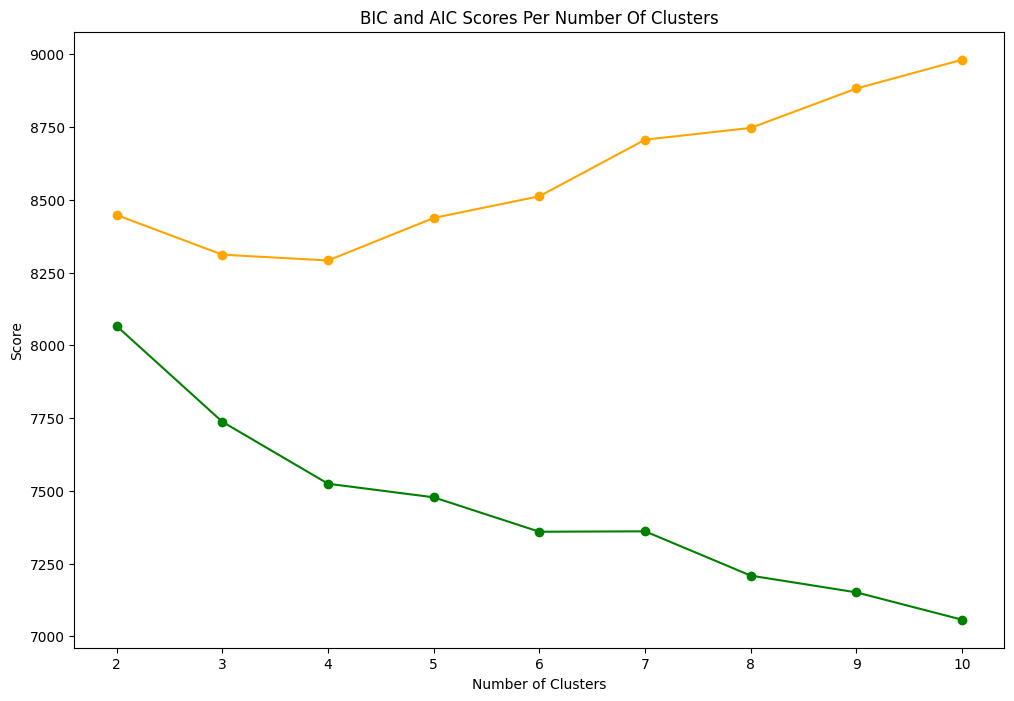

In [3]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_allnc_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_allnc_z_cl))
    aic_score.append(gm.aic(df_combined_allnc_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [4]:
n_components = 2# Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_combined_allnc_z_cl)

In [5]:
covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

predictions_z = {cov_type: gmm_model.predict(df_combined_allnc_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 0.84008046 -0.23376183 -0.05939941 -0.00718134 -0.00174631  0.13985574
  -0.07259058 -0.03084992]
 [-0.23376183  0.90182235  0.74073271 -0.04399593 -0.06192903 -0.67746164
  -0.02798182 -0.20748411]
 [-0.05939941  0.74073271  0.9995694  -0.16312564  0.05409086 -0.49053404
  -0.13673092 -0.18776926]
 [-0.00718134 -0.04399593 -0.16312564  0.50356526 -0.15340665 -0.08155913
   0.37628398 -0.00323668]
 [-0.00174631 -0.06192903  0.05409086 -0.15340665  0.31840257  0.326361
   0.06010712  0.17426642]
 [ 0.13985574 -0.67746164 -0.49053404 -0.08155913  0.326361    0.97645422
   0.01410529  0.22843437]
 [-0.07259058 -0.02798182 -0.13673092  0.37628398  0.06010712  0.01410529
   0.68049953  0.35799535]
 [-0.03084992 -0.20748411 -0.18776926 -0.00323668  0.17426642  0.22843437
   0.35799535  0.41015589]]
Covariance Matrix (tied - Component):
[ 0.99837295 -0.29038858 -0.16952647 -0.02541858 -0.00955455  0.0441058
  0.05191022  0.08873808]
Covariance Matrix (

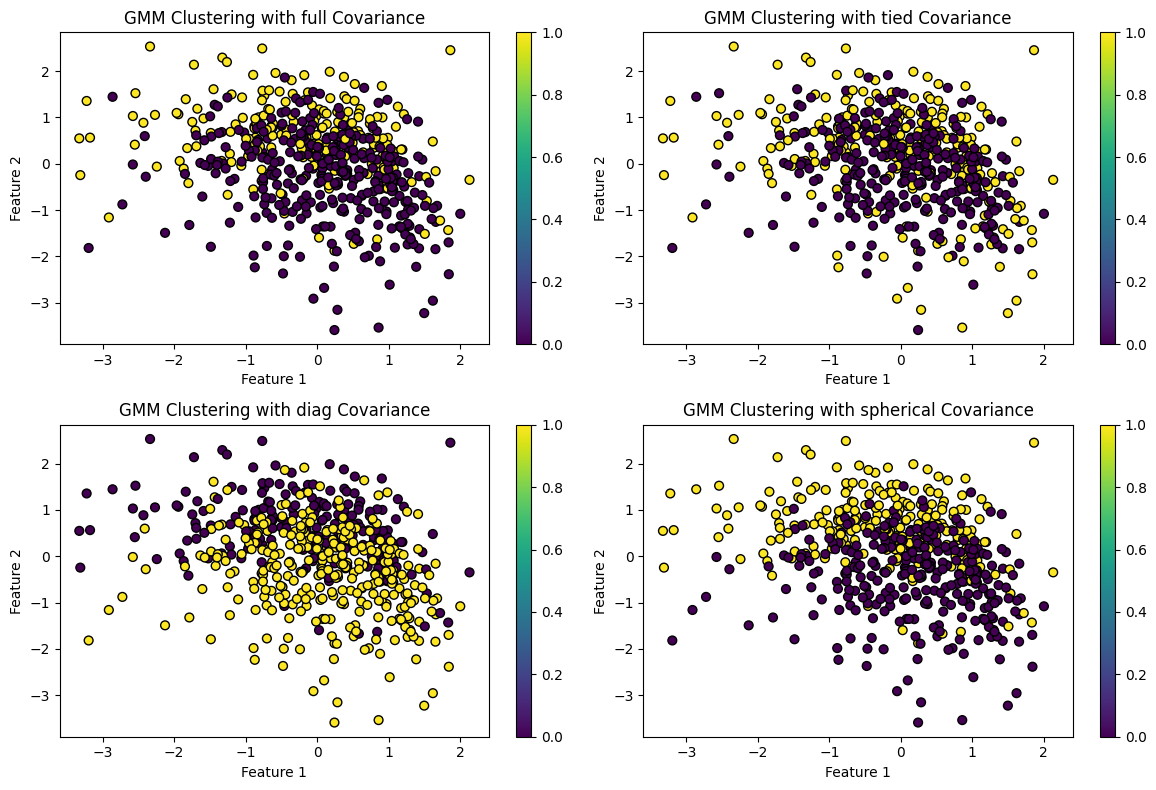

In [6]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_allnc_z_cl.iloc[:, 0], df_combined_allnc_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

In [7]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_allnc_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.244
Tied covariance: Silhouette Score = 0.208
Diag covariance: Silhouette Score = 0.262
Spherical covariance: Silhouette Score = 0.262


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


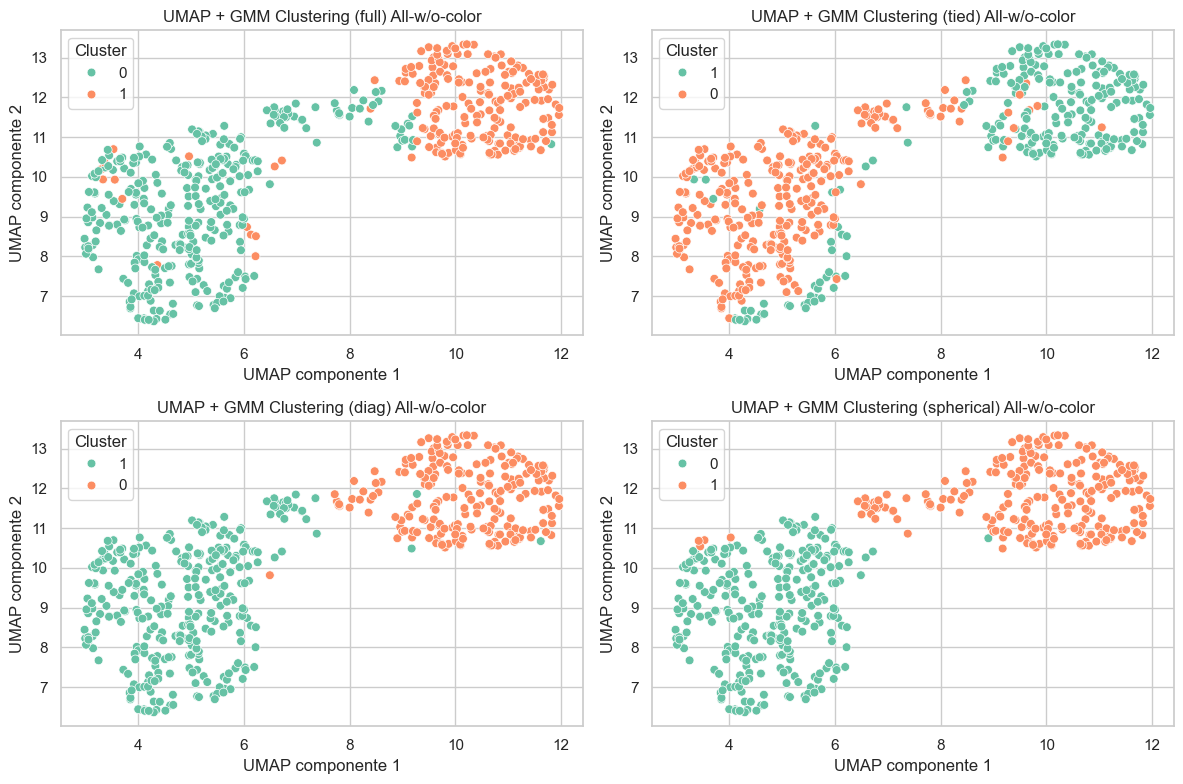

In [25]:
reducer = umap.UMAP(n_neighbors=30, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_allnc_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    df_plot = pd.DataFrame({
        'UMAP 1': embedding[:, 0],
        'UMAP 2': embedding[:, 1],
        'Cluster': predictions_z[cov_type].astype(str)
    })

    plt.subplot(2, 2, i)
    sns.scatterplot(
        data=df_plot,
        x='UMAP 1',
        y='UMAP 2',
        hue='Cluster',
        palette='Set2',
        edgecolor='white',
        s=40,
        alpha=1,
        legend='full'
    )
    plt.title(f'UMAP + GMM Clustering ({cov_type}) All-w/o-color')
    plt.xlabel('UMAP componente 1')
    plt.ylabel('UMAP componente 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
df_combined_allnc_z_cl['predictions_z_full'] = predictions_z['full']
df_combined_allnc_z_cl['predictions_z_tied'] = predictions_z['tied']
df_combined_allnc_z_cl['predictions_z_diag'] = predictions_z['diag']
df_combined_allnc_z_cl['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_allnc_z['label'], df_combined_allnc_z_cl['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_allnc_z['label'], df_combined_allnc_z_cl['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_allnc_z['label'], df_combined_allnc_z_cl['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_allnc_z['label'], df_combined_allnc_z_cl['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1
Label                   
higher          257   11
smaller          77  192

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher          256   12
smaller          40  229

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher           14  254
smaller         200   69

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher               233   35
smaller               63  206


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

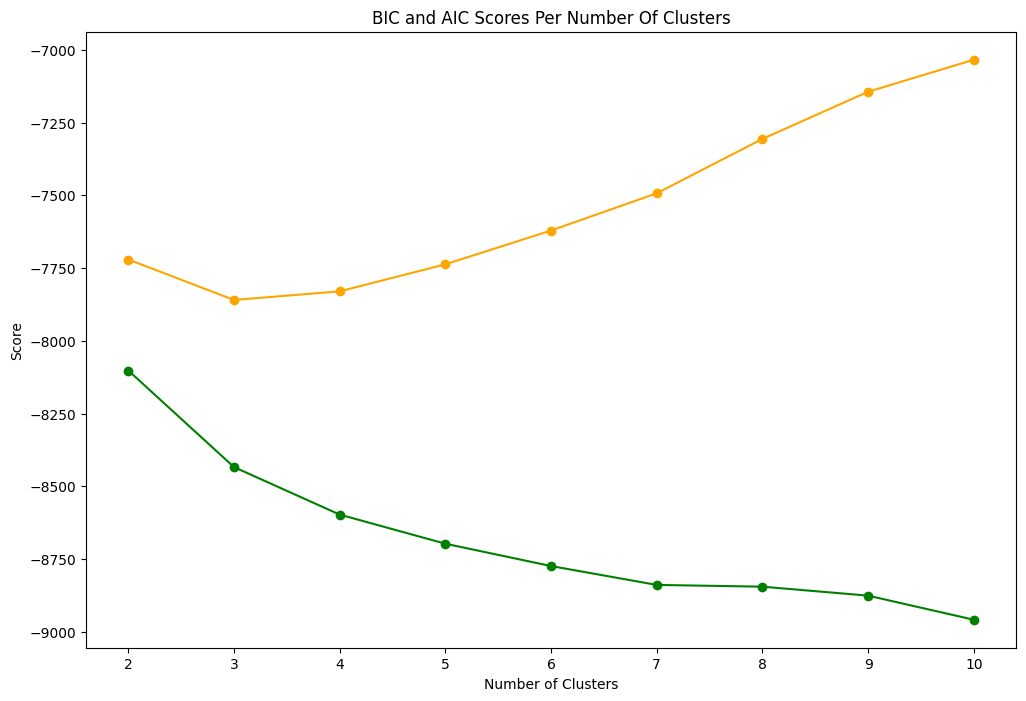

In [10]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_allnc_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_allnc_mm_cl))
    aic_score.append(gm.aic(df_combined_allnc_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [11]:
n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_allnc_mm_cl)

In [12]:
covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(df_combined_allnc_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 2.83203068e-02 -7.05943513e-03 -1.86861719e-03 -2.37684023e-04
  -1.50223349e-05  2.84248142e-03 -2.36374239e-03 -9.56785209e-04]
 [-7.05943513e-03  2.40695147e-02  2.02407887e-02 -8.64361367e-04
  -1.29445845e-03 -1.21436696e-02 -9.28158149e-04 -6.45661607e-03]
 [-1.86861719e-03  2.02407887e-02  2.79522606e-02 -3.39368079e-03
   1.08806915e-03 -9.00982490e-03 -4.27666496e-03 -6.03275599e-03]
 [-2.37684023e-04 -8.64361367e-04 -3.39368079e-03  7.88635574e-03
  -2.41038537e-03 -1.14386067e-03  8.45715809e-03 -1.02746699e-04]
 [-1.50223349e-05 -1.29445845e-03  1.08806915e-03 -2.41038537e-03
   4.98692544e-03  4.50048571e-03  1.39250126e-03  4.12541024e-03]
 [ 2.84248142e-03 -1.21436696e-02 -9.00982490e-03 -1.14386067e-03
   4.50048571e-03  1.18015160e-02  3.28344486e-04  4.75152550e-03]
 [-2.36374239e-03 -9.28158149e-04 -4.27666496e-03  8.45715809e-03
   1.39250126e-03  3.28344486e-04  2.22209077e-02  1.22303472e-02]
 [-9.56785209e-04 -6.45661607e-

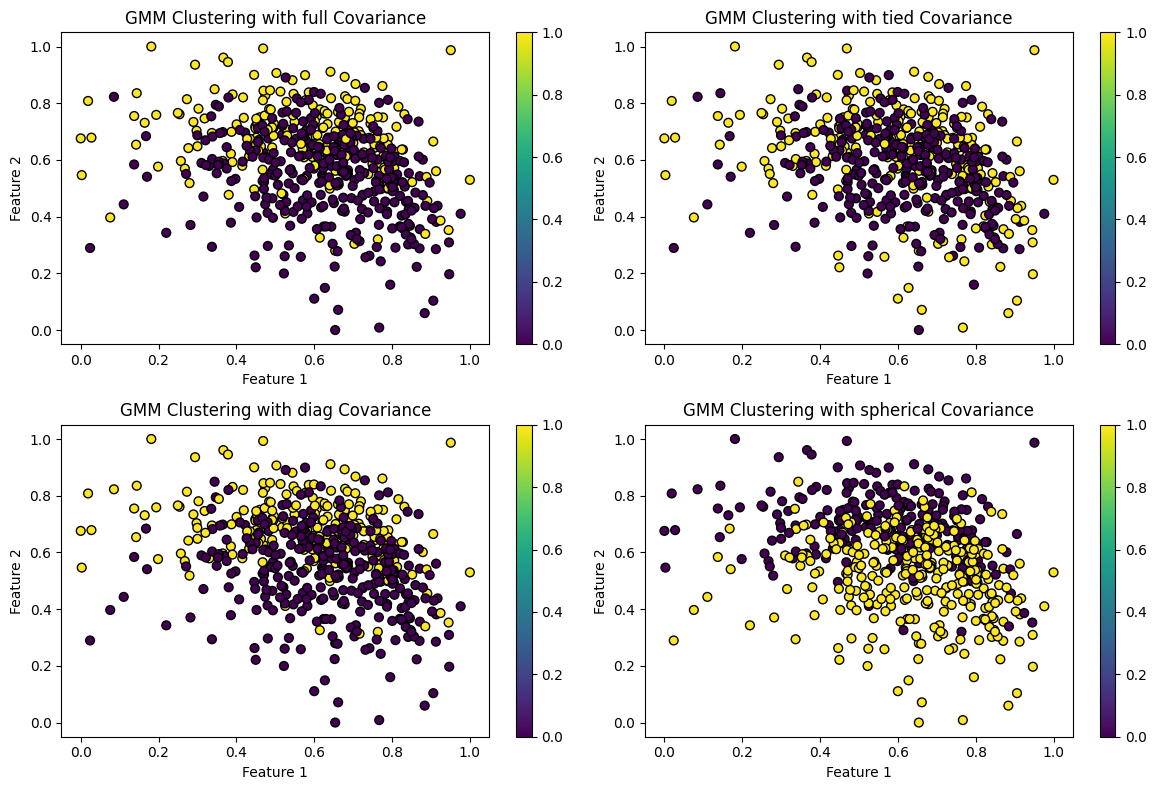

In [13]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_allnc_mm_cl.iloc[:, 0], df_combined_allnc_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


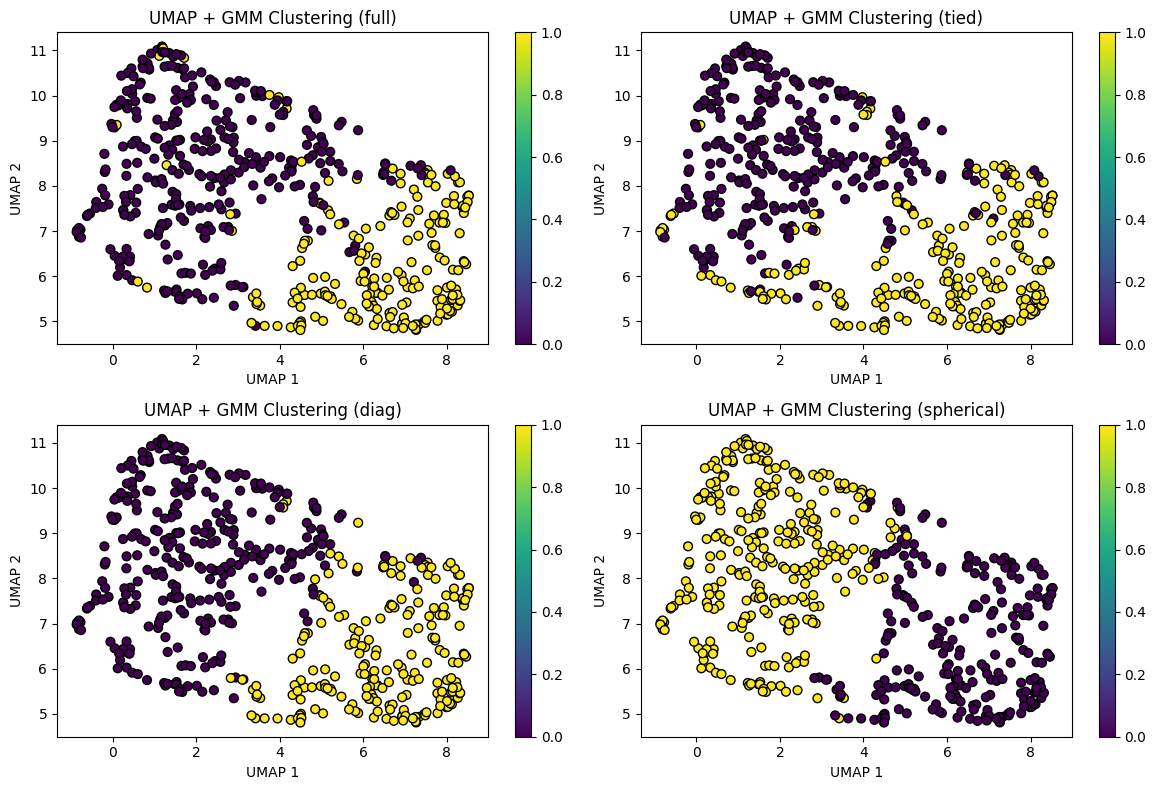

In [14]:
reducer = umap.UMAP(n_neighbors=10, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_allnc_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [15]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_allnc_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.259
Tied covariance: Silhouette Score = 0.233
Diag covariance: Silhouette Score = 0.287
Spherical covariance: Silhouette Score = 0.290


In [16]:
df_combined_allnc_mm_cl['predictions_mm_full'] = predictions_mm['full']
df_combined_allnc_mm_cl['predictions_mm_tied'] = predictions_mm['tied']
df_combined_allnc_mm_cl['predictions_mm_diag'] = predictions_mm['diag']
df_combined_allnc_mm_cl['predictions_mm_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_allnc_mm['label'], df_combined_allnc_mm_cl['predictions_mm_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_allnc_mm['label'], df_combined_allnc_mm_cl['predictions_mm_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_allnc_mm['label'], df_combined_allnc_mm_cl['predictions_mm_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_allnc_mm['label'], df_combined_allnc_mm_cl['predictions_mm_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1
Label                   
higher          257   11
smaller          79  190

Contingency Table for Tied Covariance:
Cluster (tied)    0    1
Label                   
higher          256   12
smaller          40  229

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1
Label                   
higher          254   14
smaller          69  200

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1
Label                        
higher                34  234
smaller              205   64


Teniendo en cuenta características de color:
z-score: 
-con 3 clusteres (todos los métodos de linkage) se reparten las imágenes higher entre 2 clusters, y las imágenes small están en un solo cluster. 
-con 4 clusteres: (todos los métodos de linkage) se reparten las imágenes higher entre 2 clusters, y las imágenes small están en un solo cluster. 
Si se hace reduccion de la dimensionalidad también que hay división de higher entre dos clusters.

min-max:
-con 3 clusters: uno de los cluster reune a una gran parte de las imágenes higher, y en otro cluster hay más concentración de puntos etiquetados como smaller.
-con 4 clusters: en uno de ellos siempre hay más imagenes higher y en otro más smaller, y en el restante mezcla
Con reduccion de la dimensionalidad y 4 clusters se reparte igual.



Sin tener en cuenta las características de color:
zscore: 
-con tres clusteres: en uno de ellos siempre hay más imagenes higher y en otro más smaller, y en el restante mezcla. Sin embargo, con el métodos de clustering tied, en el cluster 1 se concentran la mayor parte de las imágenes tanto smaller como higher.
-con 4 clusteres: solo con el método de linkage full las imágenes higher se reparten en dos clusteres. Con el resto, se puede ver que la mayoría de las imágenes higher están en un cluster y las smaller en otro. 

min-max:
-con tres clusteres: en uno de ellos siempre hay más imagenes higher y en otro más smaller, y en el restante mezcla. Sin embargo, con el métodos de clustering tied, en el cluster 1 se concentran la mayor parte de las imágenes tanto smaller como higher.
-con 4 clusters: en uno de ellos siempre hay más imagenes higher y en otro más smaller, y en el restante mezcla